# Trees and Forests

use `DecisionTreeClassifier` and `RandomForestClassifier` as examples of trees and ensemble methods.

In [2]:
# Import Pandas and Numpy
import numpy as np
import pandas as pd

# Import Plotting Libraries
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Process the Chicago Crime Data

In [3]:
df = pd.read_csv("C:/Users/zhaoj/OneDrive - The University of Chicago/Desktop/uchicago/Q3/Machine Learning for public policy/ML_2021/data/chicago-crimes-2019.csv")
print("Found {} NaN community area records.".format(df['Community Area'].isna().sum()))
df.dropna(inplace=True)
df['Hour'] = pd.to_datetime(df['Date']).dt.hour

Found 4 NaN community area records.


## Extract Features

In [4]:
df_backup = df.copy()
df = df.loc[:,['Hour', 'Community Area', 'Latitude', 'Longitude', 'Domestic', 'Arrest']]

## Decision Tree Classifiers

Train the model

In [5]:
labels = df.loc[:,'Hour':'Community Area'].columns.values
features = df.loc[:,'Hour':'Community Area'].values
target = df['Arrest'].values

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0,max_depth=3)
model = dt.fit(features,target)

### Visualize the Resulting Model

In [1]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


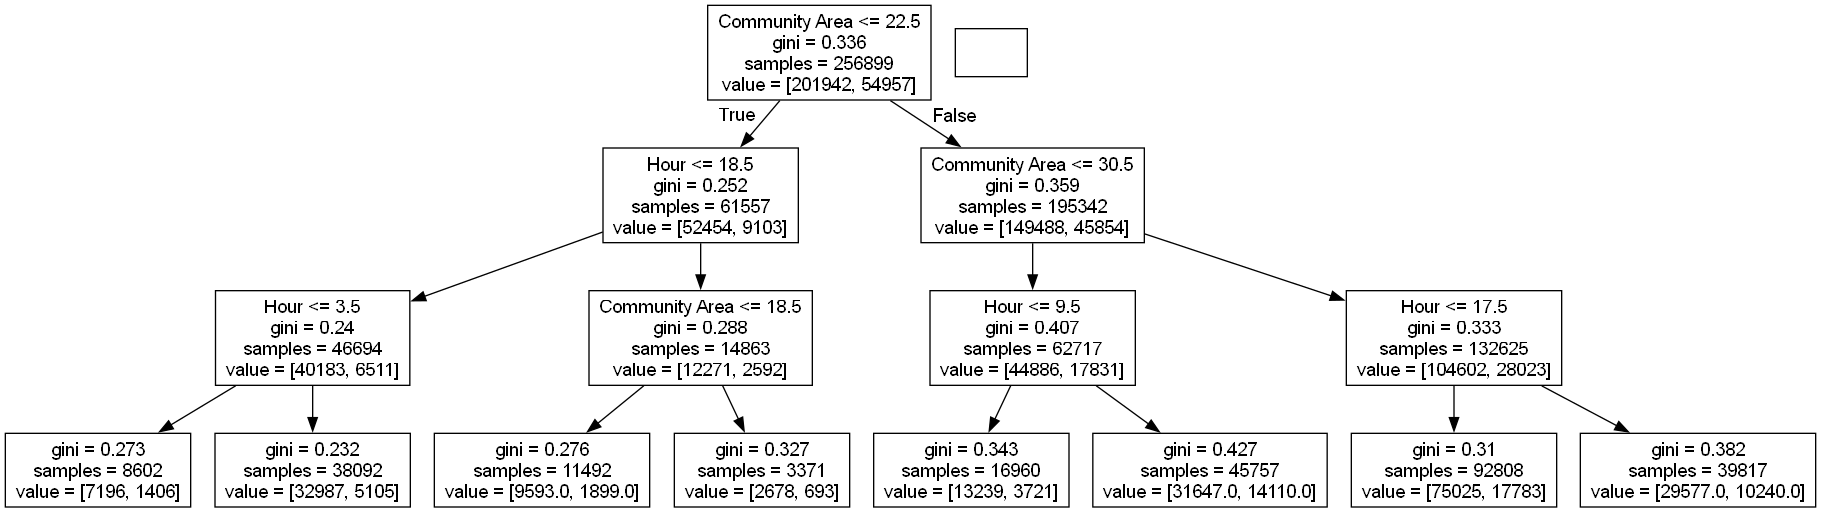

In [6]:
from sklearn import tree
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(dt, out_file=None, feature_names=labels)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Exaculate the model

In [7]:
from sklearn.model_selection import KFold, cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=23)

cv_results = cross_val_score(dt,
                             features,
                             target,
                             cv=kf,
                             scoring='accuracy'
                            )
cv_results.mean()

np.float64(0.786075456504014)

In [8]:
# Include all features.
labels = df.loc[:,'Hour':'Domestic'].columns.values
features = df.loc[:,'Hour':'Domestic'].values

cv_results = cross_val_score(dt,
                             features,
                             target,
                             cv=kf,
                             scoring='accuracy'
                            )
cv_results.mean()

np.float64(0.7861338452093064)

cv=kf：使用KFold分割器（如前面设置的5折交叉验证）。

In [9]:
# Increase Depth

dt = DecisionTreeClassifier(random_state=0,max_depth=10)

cv_results = cross_val_score(dt,
                             features,
                             target,
                             cv=kf,
                             scoring='accuracy'
                            )
cv_results.mean()

np.float64(0.7919571460080758)

## Random Forest Classifiers

The `balanced` mode, which we use below, uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as 
n_samples / (n_classes * np.bincount(y)).

In [10]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, 
                            n_jobs=-1, 
                            n_estimators=100,
                            class_weight='balanced'
                           )
model = rf.fit(features,target)

### Evaluating the Random Forest Classifier

In [11]:
# Replace with train/test split.

cv_results = cross_val_score(rf,
                             features,
                             target,
                             cv=kf,
                             scoring='accuracy'
                            )
cv_results.mean()

np.float64(0.7755616047138867)

In [12]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.80, 
                                                    random_state=5) # 70% training and 30% test

# Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# prediction on test set
y_pred=rf.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7773112105877773


### Exploring Feature Importance

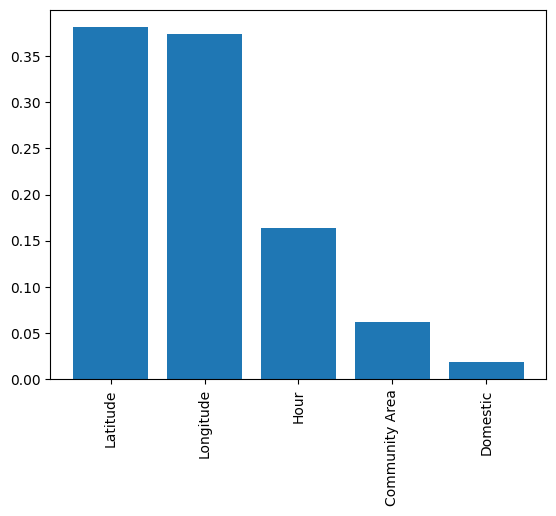

In [13]:
# Get feature importances
importances = model.feature_importances_

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
labels = df.loc[:,'Hour':'Domestic'].columns.values
names = [labels[i] for i in indices]

# Plot
plt.figure()
plt.bar(range(features.shape[1]),importances[indices])
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.show()

树模型通过一系列“分叉”来做决策，决策树是单棵树，随机森林是多棵树投票，整个过程包括特征选择、模型定义、训练、评估和应用。